In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Read in the words
words = open('/Users/rajesh/Documents/Datasets/names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [5]:
len(words)

32033

In [7]:
# Build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [9]:
# Build the dataset

block_size = 3     # Context Length: How many previous characters do we use to predict the next one?
X, Y = [], []
for w in words[:5]:
    print(w)
    context = [0] * block_size
    for ch in w + '.':
        idx = stoi[ch]
        X.append(context)
        Y.append(idx)
        print(''.join(itos[i] for i in context), '----->', itos[idx])
        context = context[1:] + [idx]     # Crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... -----> e
..e -----> m
.em -----> m
emm -----> a
mma -----> .
olivia
... -----> o
..o -----> l
.ol -----> i
oli -----> v
liv -----> i
ivi -----> a
via -----> .
ava
... -----> a
..a -----> v
.av -----> a
ava -----> .
isabella
... -----> i
..i -----> s
.is -----> a
isa -----> b
sab -----> e
abe -----> l
bel -----> l
ell -----> a
lla -----> .
sophia
... -----> s
..s -----> o
.so -----> p
sop -----> h
oph -----> i
phi -----> a
hia -----> .


In [10]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [11]:
# Embedding logup table
C = torch.randn((27,2))

In [12]:
C[5]

tensor([-0.5771, -0.2291])

In [13]:
F.one_hot(torch.tensor(5), num_classes=27)

tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0])

In [14]:
# Multiply the one hot encoding vector with the columns of C

F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([-0.5771, -0.2291])

In [18]:
# Get multiple elements
# Note that the index 7 is repeated multiple times and will be retrieved as many times
C[torch.tensor([5,6,7,7,7,7])]

tensor([[-0.5771, -0.2291],
        [-0.3132, -1.0164],
        [-0.2915,  1.8365],
        [-0.2915,  1.8365],
        [-0.2915,  1.8365],
        [-0.2915,  1.8365]])

In [19]:
C[X].shape

torch.Size([32, 3, 2])

In [20]:
# Using pytorch indexing we create our embedding as follows
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [21]:
# Construct the hidden layer
# We have 3 embeddings each of which is 2 dimensional - 6 inputs
# Assume 100 neurons in the hidden layer
# b is bias

W1 = torch.randn((6,100))
b1 = torch.randn(100)

In [22]:
# We want to multiply the embeddings by the weight
# However, the below gives an error because the embeddings have not been concatenated
emb @ W1 + b1

RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x2 and 6x100)

In [24]:
# Note that the emb is a tensor of size 32, 3, 2
# This results in a 32 x 6 tensor by concatenating the 3 embeddings
torch.cat([emb[:, 0, :], emb[:, 1, :], emb [:, 2, :]], 1)

tensor([[ 1.1960, -1.3210,  1.1960, -1.3210,  1.1960, -1.3210],
        [ 1.1960, -1.3210,  1.1960, -1.3210, -0.5771, -0.2291],
        [ 1.1960, -1.3210, -0.5771, -0.2291,  1.2075, -0.6821],
        [-0.5771, -0.2291,  1.2075, -0.6821,  1.2075, -0.6821],
        [ 1.2075, -0.6821,  1.2075, -0.6821,  0.6793, -1.3878],
        [ 1.1960, -1.3210,  1.1960, -1.3210,  1.1960, -1.3210],
        [ 1.1960, -1.3210,  1.1960, -1.3210, -1.2841,  1.7233],
        [ 1.1960, -1.3210, -1.2841,  1.7233,  2.0226, -1.2506],
        [-1.2841,  1.7233,  2.0226, -1.2506,  1.1542,  0.4299],
        [ 2.0226, -1.2506,  1.1542,  0.4299, -0.5908,  0.8096],
        [ 1.1542,  0.4299, -0.5908,  0.8096,  1.1542,  0.4299],
        [-0.5908,  0.8096,  1.1542,  0.4299,  0.6793, -1.3878],
        [ 1.1960, -1.3210,  1.1960, -1.3210,  1.1960, -1.3210],
        [ 1.1960, -1.3210,  1.1960, -1.3210,  0.6793, -1.3878],
        [ 1.1960, -1.3210,  0.6793, -1.3878, -0.5908,  0.8096],
        [ 0.6793, -1.3878, -0.5908,  0.8

In [25]:
# Use torch.unbind to remove a tensor dimension
torch.unbind(emb, 1)

(tensor([[ 1.1960, -1.3210],
         [ 1.1960, -1.3210],
         [ 1.1960, -1.3210],
         [-0.5771, -0.2291],
         [ 1.2075, -0.6821],
         [ 1.1960, -1.3210],
         [ 1.1960, -1.3210],
         [ 1.1960, -1.3210],
         [-1.2841,  1.7233],
         [ 2.0226, -1.2506],
         [ 1.1542,  0.4299],
         [-0.5908,  0.8096],
         [ 1.1960, -1.3210],
         [ 1.1960, -1.3210],
         [ 1.1960, -1.3210],
         [ 0.6793, -1.3878],
         [ 1.1960, -1.3210],
         [ 1.1960, -1.3210],
         [ 1.1960, -1.3210],
         [ 1.1542,  0.4299],
         [-0.6814, -0.0943],
         [ 0.6793, -1.3878],
         [-0.6247,  1.1240],
         [-0.5771, -0.2291],
         [ 2.0226, -1.2506],
         [ 1.1960, -1.3210],
         [ 1.1960, -1.3210],
         [ 1.1960, -1.3210],
         [-0.6814, -0.0943],
         [-1.2841,  1.7233],
         [ 0.6852, -2.2540],
         [-0.2732,  0.7326]]),
 tensor([[ 1.1960, -1.3210],
         [ 1.1960, -1.3210],
         [-0

In [26]:
# Note that the Pytorch concatenation creates a whole new tensor that uses new memory

torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([32, 6])

In [27]:
# Torch views are more efficient ways of concatenating the data
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [28]:
# The above torch vector can be represented as different sized tensors
a.view(2,9)

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16, 17]])

In [29]:
a.view(3,3,2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [31]:
# Storage is always a 1-D vector in memory
a.storage()

# Reference: log.ezyang.com (PyTorch internals)

 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage._TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [32]:
emb.shape

torch.Size([32, 3, 2])

In [33]:
emb.view(32,6)

tensor([[ 1.1960, -1.3210,  1.1960, -1.3210,  1.1960, -1.3210],
        [ 1.1960, -1.3210,  1.1960, -1.3210, -0.5771, -0.2291],
        [ 1.1960, -1.3210, -0.5771, -0.2291,  1.2075, -0.6821],
        [-0.5771, -0.2291,  1.2075, -0.6821,  1.2075, -0.6821],
        [ 1.2075, -0.6821,  1.2075, -0.6821,  0.6793, -1.3878],
        [ 1.1960, -1.3210,  1.1960, -1.3210,  1.1960, -1.3210],
        [ 1.1960, -1.3210,  1.1960, -1.3210, -1.2841,  1.7233],
        [ 1.1960, -1.3210, -1.2841,  1.7233,  2.0226, -1.2506],
        [-1.2841,  1.7233,  2.0226, -1.2506,  1.1542,  0.4299],
        [ 2.0226, -1.2506,  1.1542,  0.4299, -0.5908,  0.8096],
        [ 1.1542,  0.4299, -0.5908,  0.8096,  1.1542,  0.4299],
        [-0.5908,  0.8096,  1.1542,  0.4299,  0.6793, -1.3878],
        [ 1.1960, -1.3210,  1.1960, -1.3210,  1.1960, -1.3210],
        [ 1.1960, -1.3210,  1.1960, -1.3210,  0.6793, -1.3878],
        [ 1.1960, -1.3210,  0.6793, -1.3878, -0.5908,  0.8096],
        [ 0.6793, -1.3878, -0.5908,  0.8

In [34]:
# Elementwise equality comparison
emb.view(32,6) == torch.cat(torch.unbind(emb, 1), 1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [35]:
# Back to the hidden layer

# Note that the -1 is interpreted by Pytorch as the remaining number of elements
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

# Note that + b1 is using broadcasting.
# (emb.view(-1, 6) @ W1).shape = torch.Size([32,100])
# b1.shape = torch.Size([100])
# Broadcasting will align from the right and create a fake dimension (32)
# 32, 100
# 1, 100

In [36]:
h

tensor([[-0.8824, -0.9436, -0.9902,  ...,  0.9998, -0.8671,  0.5502],
        [-0.9745,  0.4683,  0.3501,  ...,  0.7964,  0.8828,  0.9975],
        [-0.8380, -0.2689, -0.9956,  ...,  0.9753, -0.9988, -0.9362],
        ...,
        [ 0.9512, -0.9699, -0.8260,  ..., -0.9998,  0.9580, -0.0167],
        [-0.9100,  0.3560,  0.0192,  ..., -0.0477, -0.9796, -0.3332],
        [-0.1659, -0.4239, -0.5958,  ...,  0.9731,  0.3468, -0.8914]])

In [37]:
# Hidden layer activations for every one of our 32 examples
h.shape

torch.Size([32, 100])

In [39]:
# Create the output layer
W2 = torch.randn((100,27))
b2 = torch.randn(27)

In [40]:
logits = h @ W2 + b2

In [41]:
logits.shape

torch.Size([32, 27])

In [42]:
counts = logits.exp()

In [43]:
prob = counts / counts.sum(1, keepdims=True)

In [44]:
prob.shape

torch.Size([32, 27])

In [45]:
torch.arange(32)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [46]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [47]:
# Extract the probabilities of the expected output (Y)
prob[torch.arange(32), Y]

tensor([5.4865e-07, 1.7293e-09, 3.2944e-06, 9.5399e-09, 5.5139e-09, 5.5676e-10,
        1.1106e-12, 5.9247e-07, 6.0100e-07, 6.0706e-12, 7.5055e-05, 4.4485e-10,
        1.6402e-09, 5.9678e-15, 1.0081e-12, 7.4332e-17, 1.3846e-14, 7.3601e-12,
        6.1881e-15, 1.5773e-09, 3.3201e-10, 1.5053e-03, 1.9106e-04, 8.6259e-09,
        3.7251e-09, 2.4509e-08, 3.5941e-15, 9.7709e-01, 1.3646e-03, 1.5575e-06,
        6.8454e-10, 1.1420e-08])

In [48]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(19.7612)

In [ ]:
# Putting it all together

In [49]:
X.shape, Y.shape

(torch.Size([32, 3]), torch.Size([32]))

In [50]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100,27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [51]:
sum(p.nelement() for p in parameters) # Total number of parameters in the network

3481

In [52]:
emb = C[X] #(32, 3,2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
counts = logits.exp()
prob = counts / counts.sum(1, keepdims=True)
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(17.7697)

In [53]:
# The loss calculation is encapsulated in the Functional.cross_entropy function
# We get the exact same loss as above
F.cross_entropy(logits,Y)

tensor(17.7697)

In [55]:
# F.cross_entropy is more computationally efficient as it doesn't create new intermediate tensors
# F.cross_entropy is numerically well behaved.
logits = torch.tensor([-2, -3, 0, 5])
counts = logits.exp()
probs = counts / counts.sum()
probs

tensor([9.0466e-04, 3.3281e-04, 6.6846e-03, 9.9208e-01])

In [56]:
# Large positive numbers can result in out of range (or NaN)
logits = torch.tensor([-100, -3, 0, 100])
counts = logits.exp()
probs = counts / counts.sum()
probs

tensor([0., 0., 0., nan])

In [ ]:
# Cross Entropy calculation subtracts the largest positive number to keep the numeric calculation well behaved.

In [57]:
logits = torch.tensor([-5, -3, 0, 5])
counts = logits.exp()
probs = counts / counts.sum()
probs

tensor([4.5079e-05, 3.3309e-04, 6.6903e-03, 9.9293e-01])

In [ ]:
# Subtract the largest positive number

In [58]:
# The result is the same
logits = torch.tensor([-5, -3, 0, 5]) - 5
counts = logits.exp()
probs = counts / counts.sum()
probs

tensor([4.5079e-05, 3.3309e-04, 6.6903e-03, 9.9293e-01])

In [59]:
for p in parameters:
    p.requires_grad = True

In [62]:
# Set up training of the neural network
# Learning rate eta
eta = 0.1

for _ in range(100):

    # Forward pass
    emb = C[X] #(32, 3,2)
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y)
    # print(loss.item())
    
    # Backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # Parameter update
    for p in parameters:
        p.data += -eta * p.grad

print(loss.item())


0.25560152530670166


In [63]:
# Print the max of logits along the first dimension
# Pytorch prints the max values and also the indices that can be compared with Y
logits.max(1)

torch.return_types.max(
values=tensor([13.4138, 17.9647, 20.6772, 20.7265, 16.8572, 13.4138, 16.1148, 14.2719,
        16.0143, 18.5009, 16.0740, 21.0530, 13.4138, 17.2576, 17.2659, 20.2015,
        13.4138, 16.7051, 15.2578, 17.2019, 18.6944, 16.1059, 10.9961, 10.7945,
        15.5882, 13.4138, 16.2896, 17.0883, 12.8242, 16.2912, 19.2261, 16.1884],
       grad_fn=<MaxBackward0>),
indices=tensor([19, 13, 13,  1,  0, 19, 12,  9, 22,  9,  1,  0, 19, 22,  1,  0, 19, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0]))

In [64]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [83]:
# Read the full data set and optimize the neural network

# Build the dataset

block_size = 3     # Context Length: How many previous characters do we use to predict the next one?
X, Y = [], []
for w in words:
    # print(w)
    context = [0] * block_size
    for ch in w + '.':
        idx = stoi[ch]
        X.append(context)
        Y.append(idx)
        # print(''.join(itos[i] for i in context), '----->', itos[idx])
        context = context[1:] + [idx]     # Crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

In [84]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [89]:
# Intialize the network
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100,27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [90]:
sum(p.nelement() for p in parameters)

3481

In [91]:
for p in parameters:
    p.requires_grad = True

In [71]:
# Set up training of the neural network
# Learning rate eta
eta = 0.1

for _ in range(10):

    # Forward pass
    emb = C[X] #(228146, 3,2)
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y)
    print(loss.item())
    
    # Backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # Parameter update
    for p in parameters:
        p.data += -eta * p.grad

# print(loss.item())

10.709587097167969
10.407631874084473
10.127808570861816
9.864364624023438
9.614501953125
9.376439094543457
9.148944854736328
8.931110382080078
8.722230911254883
8.521749496459961


In [74]:
# The above network reduces the loss but much too slowly
# Instead of performing forward and backward passes on the entire training set, randomly select mini-batches.

# Mini-batch size = 32
torch.randint(0, X.shape[0], (32,))

tensor([ 46329,  45448,  76040, 110853, 184071,  99147, 145450, 105784, 156240,
         40849, 195380, 228129, 182621, 118037,  57119, 176396, 161568,  32745,
           307,  12633,  15417,  75044, 177368, 125289, 213544, 194014,  70736,
         84005, 212725,   5563, 118462, 100756])

In [80]:
# Set up training of the neural network
# Learning rate eta
eta = 0.1

for _ in range(1000):
    
    # Construct minibatch
    idx = torch.randint(0, X.shape[0], (32,))

    # Forward pass
    emb = C[X[idx]] #(32, 3,2)
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y[idx])
    #print(loss.item())
    
    # Backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # Parameter update
    for p in parameters:
        p.data += -eta * p.grad

print(loss.item())

2.6868302822113037


In [81]:
# Calculate the loss for the entire dataset
emb = C[X] #(32, 3,2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Y)
print(loss.item())

2.628147602081299


In [82]:
# Experimenting with the learning rate
# Change the learning rate from 0.001 to 1 during training

lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [92]:
# Set up training of the neural network
lri = []
lossi = []

for i in range(1000):
    
    # Construct minibatch
    idx = torch.randint(0, X.shape[0], (32,))

    # Forward pass
    emb = C[X[idx]] #(32, 3,2)
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y[idx])
    # print(loss.item())
    
    # Backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # Parameter update
    lr = lrs[i]
    for p in parameters:
        p.data += -lr * p.grad
        
    # Track stats
    lri.append(lre[i])
    lossi.append(loss.item())

print(loss.item())

7.376246452331543


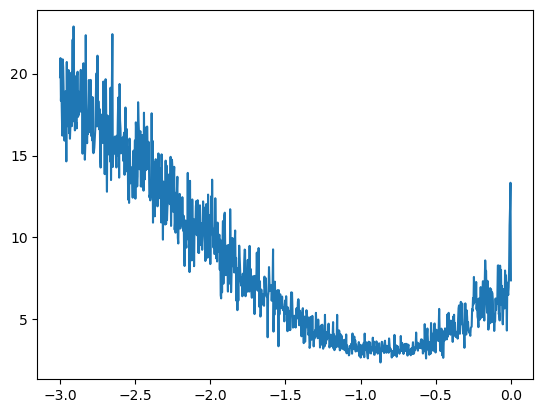

In [93]:
plt.plot(lri,lossi)

# The chart below shows that the learning rate exponent of about -1.0 is pretty good
# This gives the ideal learning rate as 0.1

In [94]:
# Read the full data set and optimize the neural network

# Build the dataset

block_size = 3     # Context Length: How many previous characters do we use to predict the next one?
X, Y = [], []
for w in words:
    # print(w)
    context = [0] * block_size
    for ch in w + '.':
        idx = stoi[ch]
        X.append(context)
        Y.append(idx)
        # print(''.join(itos[i] for i in context), '----->', itos[idx])
        context = context[1:] + [idx]     # Crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

In [95]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100,27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [96]:
for p in parameters:
    p.requires_grad = True

In [100]:
# Set up training of the neural network
eta = 0.1

for i in range(10000):
    
    # Construct minibatch
    idx = torch.randint(0, X.shape[0], (32,))

    # Forward pass
    emb = C[X[idx]] #(32, 3,2)
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y[idx])
    # print(loss.item())
    
    # Backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # Parameter update
    for p in parameters:
        p.data += -eta * p.grad

print(loss.item())

2.39837384223938


In [101]:
# Calculate the loss for the entire dataset
emb = C[X] #(32, 3,2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Y)
print(loss.item())

2.2873759269714355


In [ ]:
# Note that 2.28 is better than the loss on the bigram model that we achieved